# Analysis of Used Cars Dataset

## Data Exploration and Cleaning

In [1]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
# Import data.

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

library("aws.s3")
obj <- get_object(
    object = "USA_cars_datasets.csv",
    bucket = "analyzingusedcarsdata-donotdelete-pr-rxmrstnfibbf2r",
    key = "232b94b72a34480b93deebb80fdab40e",
    secret = "b407316a2d427eddd34abeb578b85d8e5ab484e1a1218cd4",
    check_region = FALSE,
    base_url = "s3-api.us-geo.objectstorage.service.networklayer.com")

cars <- read.csv(text = rawToChar(obj))
head(cars)


X,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700,dodge,mpv,2018,clean vehicle,45561,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left


In [3]:
# View the kind of variables in the dataset.

str(cars)

'data.frame':	2499 obs. of  13 variables:
 $ X           : int  0 1 2 3 4 5 6 7 8 9 ...
 $ price       : int  6300 2899 5350 25000 27700 5700 7300 13350 14600 5250 ...
 $ brand       : Factor w/ 28 levels "acura","audi",..: 28 9 8 9 6 8 6 10 6 9 ...
 $ model       : Factor w/ 127 levels "1500","2500",..: 26 93 76 33 1 76 87 33 72 76 ...
 $ year        : int  2008 2011 2018 2014 2018 2018 2010 2017 2018 2017 ...
 $ title_status: Factor w/ 2 levels "clean vehicle",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ mileage     : num  274117 190552 39590 64146 6654 ...
 $ color       : Factor w/ 49 levels "beige","billet silver metallic clearcoat",..: 3 40 40 5 35 47 3 16 40 3 ...
 $ vin         : Factor w/ 2495 levels "  19uua96529a004646",..: 2393 1666 1886 968 2088 1650 1194 1239 1123 1706 ...
 $ lot         : int  159348797 166951262 167655728 167753855 167763266 167655771 167753872 167692494 167763267 167656121 ...
 $ state       : Factor w/ 44 levels "alabama","arizona",..: 25 36 8 40 7 37 8 4 7 37 ...


In [4]:
# Remove unnecessary columns.

cars <- subset(cars, select = -c(X, vin, lot, condition))
head(cars)

price,brand,model,year,title_status,mileage,color,state,country
6300,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa
2899,ford,se,2011,clean vehicle,190552,silver,tennessee,usa
5350,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa
25000,ford,door,2014,clean vehicle,64146,blue,virginia,usa
27700,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa
5700,dodge,mpv,2018,clean vehicle,45561,white,texas,usa


In [5]:
# Display descriptive statistics.

summary(cars$price)
summary(cars$mileage)
summary(cars$year)
print('Price statistics is the first row, then mileage, and year')

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   10200   16900   18768   25556   84900 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0   21466   35365   52299   63472 1017936 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1973    2016    2018    2017    2019    2020 

[1] "Price statistics is the first row, then mileage, and year"


#### Notice how the minimum value of price and mileage is 0. Something is wrong so, we are going to investigate how many observations have a price value of $0.

In [6]:
zero_price <- subset(cars, price == 0, select = c(price))
nrow(zero_price)

[1] 43

In [7]:
# Since there are 43 observations with a price value of $0, we are going to replace that value with the average price.

cars$price[which(cars$price == 0)] <- mean(cars$price)
summary(cars$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     25   10800   17347   19091   25556   84900 

#### I have successfully replaced the price of each car with an initial value of 0, with the average price of the car from the dataset. I will continue with the analysis of my new dataset which contains 2,499 rows and 9 columns.

## Exploratory Data Analysis

In [8]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


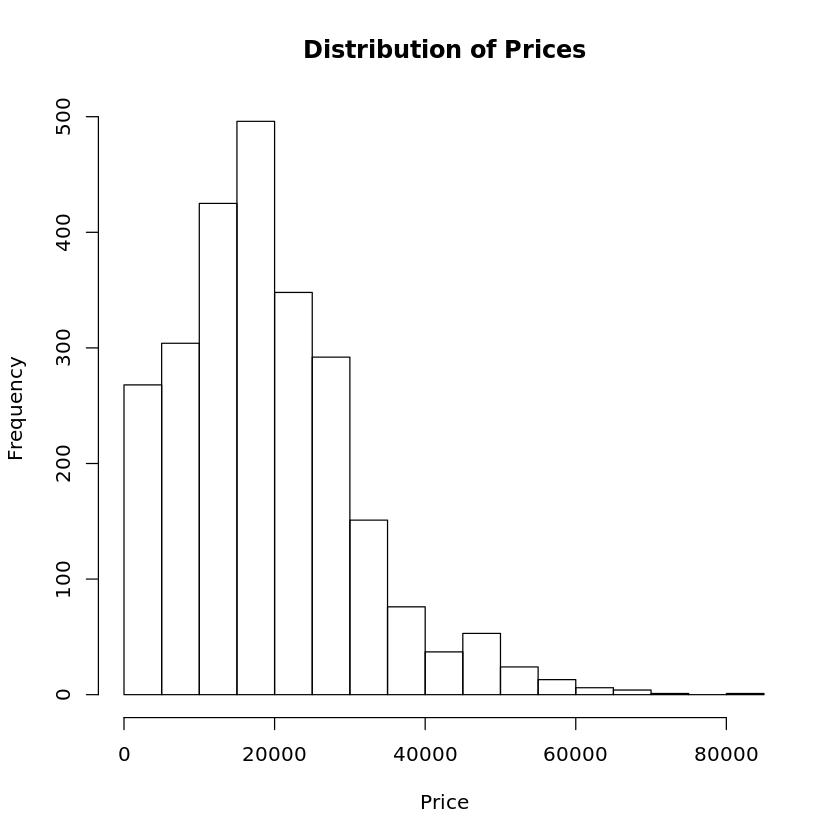

In [19]:
# Let's plot the distribution of prices.

hist(cars$price, main = 'Distribution of Prices', xlab = 'Price')

In [36]:
# Find the top brands in descending order.

top_brands <- sort(table(cars$brand), decreasing = TRUE)
top_brands_df <- as.data.frame(top_brands)                # Converting table into a dataframe.
colnames(top_brands_df) <- c('Brand', 'Count')
str(top_brands_df)
head(top_brands_df, n = 5)

'data.frame':	28 obs. of  2 variables:
 $ Brand: Factor w/ 28 levels "ford","dodge",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Count: int  1235 432 312 297 42 30 18 17 15 13 ...


Brand,Count
ford,1235
dodge,432
nissan,312
chevrolet,297
gmc,42


In [42]:
# Top 5 brands dataframe

top_5_brands <- top_brands_df[1:5, ]
top_5_brands

Brand,Count
ford,1235
dodge,432
nissan,312
chevrolet,297
gmc,42


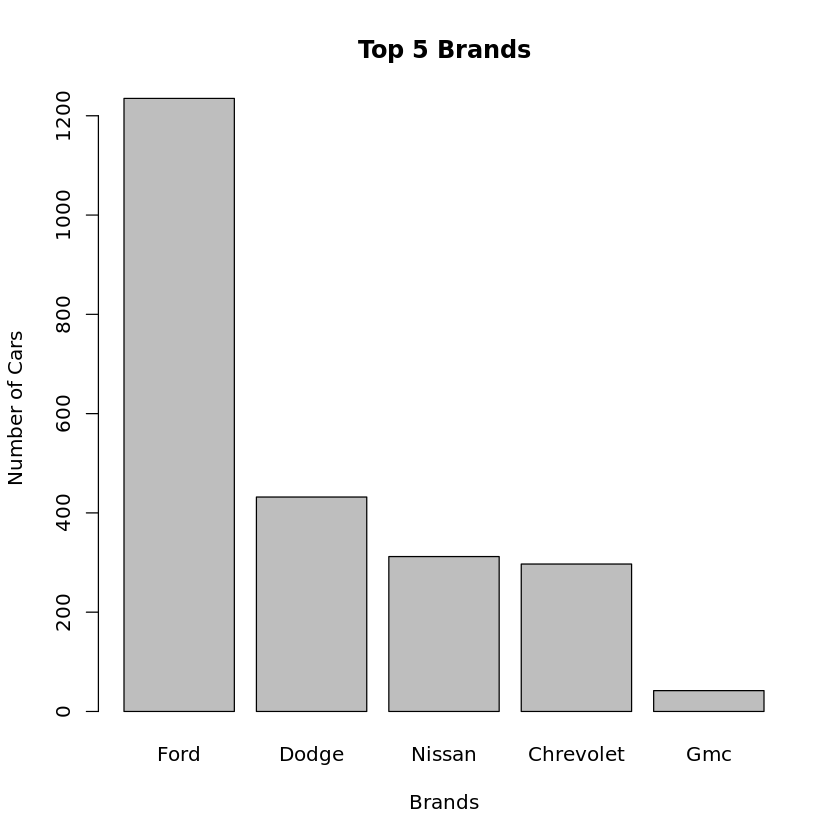

In [45]:
# Top 5 brands bar chart

barplot(top_5_brands$Count, main = 'Top 5 Brands', xlab = 'Brands', ylab = 'Number of Cars', 
        names.arg = c('Ford', 'Dodge', 'Nissan', 'Chrevolet', 'Gmc'))

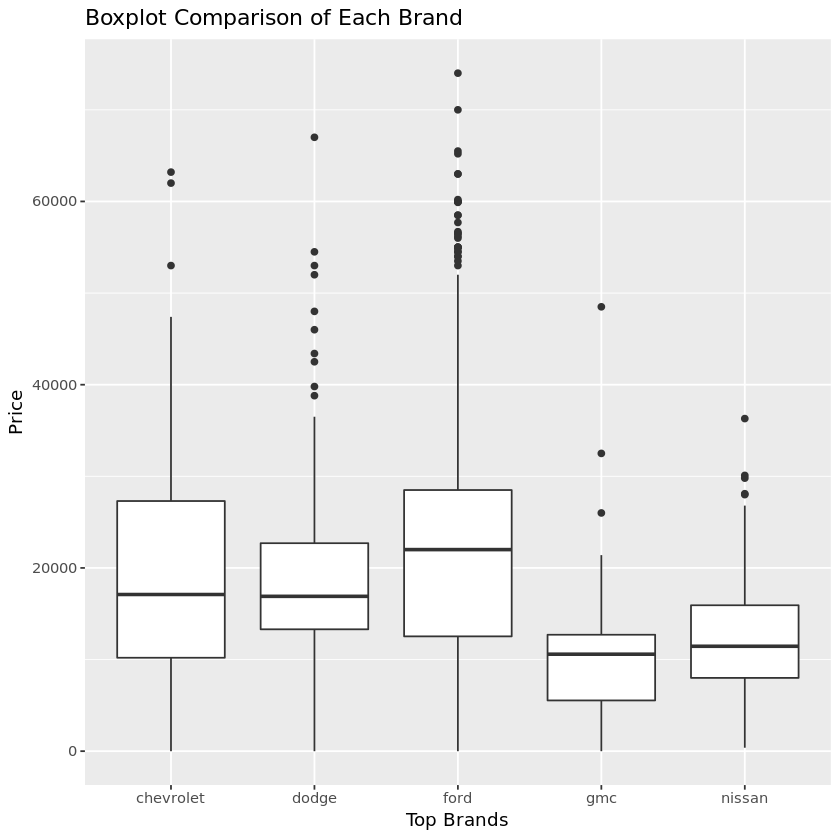

In [28]:
# Let's visualize the average price of the top 5 brands.

top_brands <- cars[which(cars$brand == 'ford' | cars$brand ==  'dodge' | cars$brand == 'nissan' | cars$brand == 'chevrolet' | cars$brand == 'gmc'), ]

ggplot(data = top_brands, aes(x = brand, y = price)) + 
    geom_boxplot() + 
    xlab('Top Brands') + 
    ylab('Price') + 
    ggtitle('Boxplot Comparison of Each Brand')

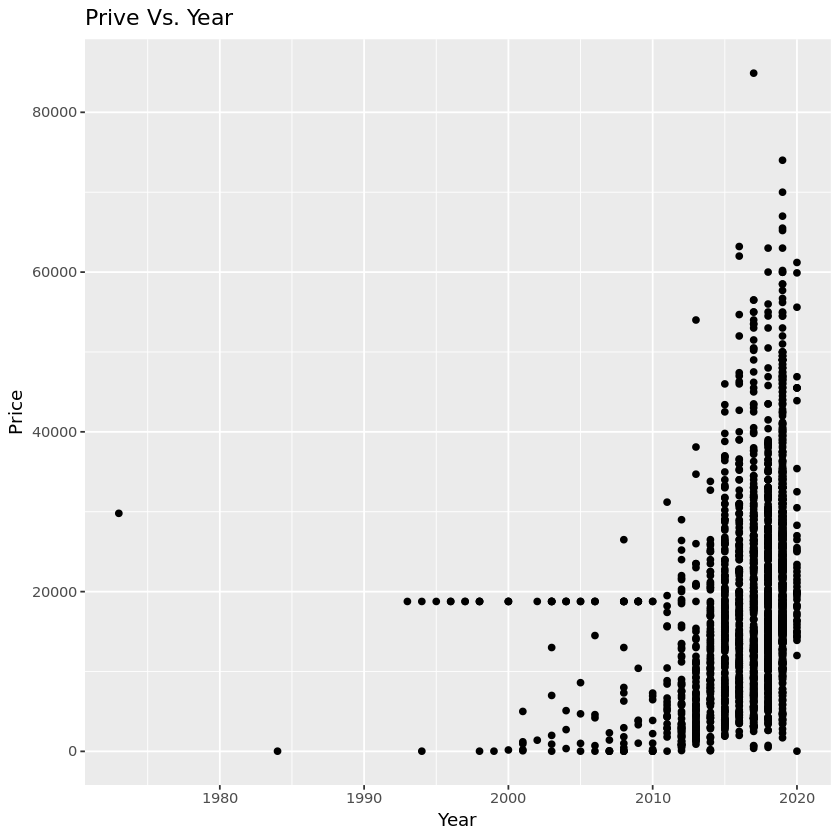

In [10]:
# Scatterplot of Price vs. Year

ggplot(data = cars, aes(x = year, y = price)) + 
    geom_point() +
    xlab('Year') +
    ylab('Price') +
    ggtitle('Prive Vs. Year')

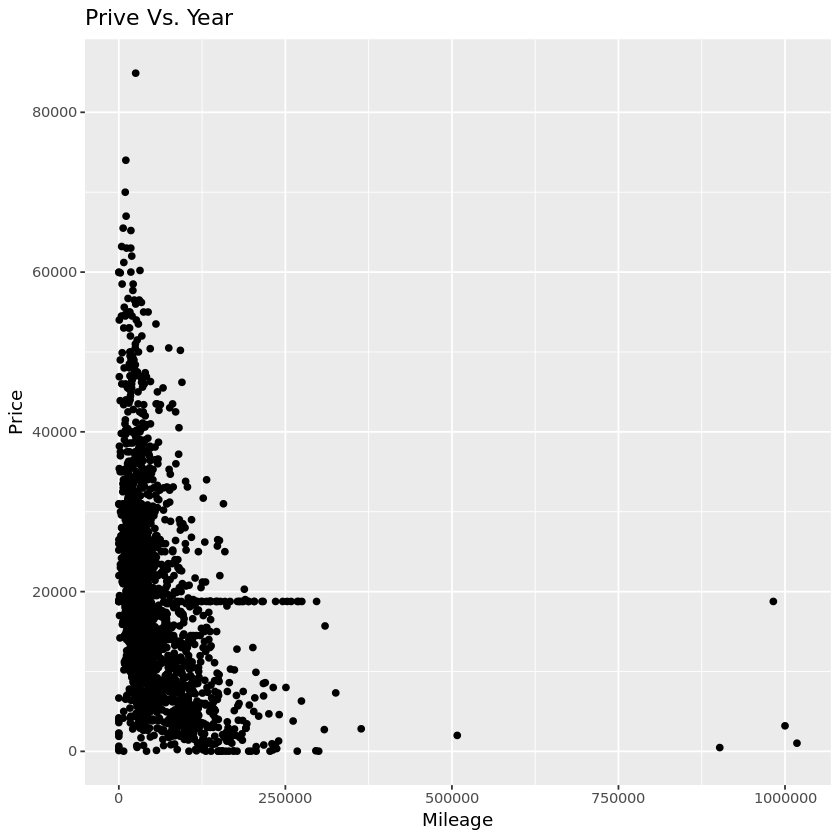

In [13]:
# Scatterplot of Mileage and Price

ggplot(data = cars, aes(x = mileage, y = price)) + 
    geom_point() +
    xlab('Mileage') +
    ylab('Price') +
    ggtitle('Prive Vs. Year')

In [20]:
# Correlation Matrix

numeric_col <- subset(cars, select = c(price, mileage, year))
round(cor(numeric_col), 2)

,price,mileage,year
price,1.00,-0.35,0.33
mileage,-0.35,1.00,-0.59
year,0.33,-0.59,1.00


#### Since the correlation between mileage, year versus price isn't high, I don't expect the regression model to obtain a high R-Square value.

## Regression Model

In [25]:
# Regression model with Mileage and Year as predictors.

lm.fit1 <- lm(price ~ mileage + year, data = cars)
summary(lm.fit1)


Call:
lm(formula = price ~ mileage + year, data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-23331  -7717  -1986   5485  64327 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.265e+06  1.599e+05  -7.907 3.93e-15 ***
mileage     -4.815e-02  4.569e-03 -10.540  < 2e-16 ***
year         6.378e+02  7.923e+01   8.049 1.28e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10960 on 2496 degrees of freedom
Multiple R-squared:  0.1464,	Adjusted R-squared:  0.1458 
F-statistic: 214.1 on 2 and 2496 DF,  p-value: < 2.2e-16


#### My prediction of the R-Square value is correct. There wasn't a high correlation to begin with, which is why I expected a low R-Square score.

In [26]:
# Regression model with Mileage, Year and Brand as predictors.

lm.fit2 <- lm(price ~ brand + mileage + year, data = cars)
summary(lm.fit2)


Call:
lm(formula = price ~ brand + mileage + year, data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-51177  -6237  -1559   4463  54300 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.251e+06  1.561e+05  -8.017 1.66e-15 ***
brandaudi             1.069e+04  7.655e+03   1.396  0.16284    
brandbmw              1.309e+04  6.283e+03   2.084  0.03730 *  
brandbuick            5.165e+03  6.430e+03   0.803  0.42186    
brandcadillac         1.166e+04  6.605e+03   1.765  0.07769 .  
brandchevrolet        5.314e+03  5.824e+03   0.912  0.36163    
brandchrysler         6.561e+02  6.256e+03   0.105  0.91648    
branddodge            1.452e+03  5.821e+03   0.249  0.80300    
brandford             6.351e+03  5.806e+03   1.094  0.27410    
brandgmc             -2.463e+03  5.996e+03  -0.411  0.68124    
brandharley-davidson  3.691e+04  1.158e+04   3.187  0.00146 ** 
brandheartland       -9.128e+03  7.338e+03  -1.244  0.21360    
bran

In [27]:
# Regression model with all 8 variables as predictors.

lm.fit3 <- lm(price ~ ., data = cars)
summary(lm.fit3)


Call:
lm(formula = price ~ ., data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-31466  -3298    -78   2249  38278 

Coefficients: (7 not defined because of singularities)
                                               Estimate Std. Error t value
(Intercept)                                  -3.598e+05  1.468e+05  -2.451
brandaudi                                     1.087e+04  6.796e+03   1.600
brandbmw                                      6.554e+03  5.588e+03   1.173
brandbuick                                    1.002e+04  5.429e+03   1.845
brandcadillac                                 1.461e+04  5.485e+03   2.663
brandchevrolet                                7.043e+03  4.860e+03   1.449
brandchrysler                                -2.079e+02  5.341e+03  -0.039
branddodge                                    2.363e+03  4.869e+03   0.485
brandford                                     8.091e+03  4.831e+03   1.675
brandgmc                                      2.281e+03  4.993e+03

#### If we include all variables as predictors, then we will obtain a R-Square value of 0.71 which is not bad. The only problem is that the categorical columns has a lot of factors which makes the regression model cumbersome.